<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%205/Plotly_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly Basics
**Plotly plots may not be visible in GitHub. Open this in colab to view the plots.**

In [1]:
!pip install plotly==5.1.0
!pip install cufflinks
!pip install chart_studio

You should consider upgrading via the 'c:\users\mayur garg\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=ac6233c3429b31be63c2c376c8757608ba3c6a9344d0c85f00a5c101bd5479e6
  Stored in directory: c:\users\mayur garg\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


You should consider upgrading via the 'c:\users\mayur garg\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\mayur garg\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=3d4927498371a4c49ea067976e4a3480b0b10530b887884874bcb143ceff6467
  Stored in directory: c:\users\mayur garg\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


## Imports

In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py # To create charts
import cufflinks as cf # Enables plotly for pandas
import seaborn as sns
import plotly.express as px
import IPython
%matplotlib inline

#Enable plotly to work in a notebook in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#Required to make plotly graphs visible in Google Colab
import plotly.io as pio
pio.renderers.default = 'colab'

## Line Charts

In [4]:
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns = ['A','B','C','D'])
df_1.head()

,A,B,C,D
0,0.060702,1.816571,-1.322454,0.818475
1,0.573331,0.224956,0.637179,-0.865763
2,1.479445,-0.901862,0.123052,0.950239
3,-0.638223,1.150786,0.354698,-0.212526
4,0.108734,-0.852710,-1.028453,0.918203


<AxesSubplot:>

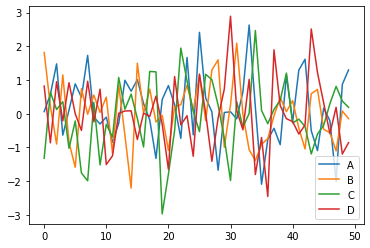

In [5]:
#Matplotlib plot
df_1.plot()

In [6]:
#Plotly plot
df_1.iplot()

In [7]:
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [8]:
import plotly.graph_objects as go

px.line(df_stocks, x = 'date', y = 'GOOG', labels = {'x':'Date', 'y':'Price'})

px.line(df_stocks, x = 'date', y = ['GOOG','AAPL'], labels = {'x':'Date', 'y':'Price'},
       title = 'Apple Vs. Google')

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AAPL, 
                        mode = 'lines', name = 'Apple'))
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AMZN, 
                        mode = 'lines+markers', name = 'Amazon'))

fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode = 'lines+markers', name = 'Google',
                        line=dict(color = 'firebrick', width = 2, dash = 'dashdot')))

fig.update_layout(
    xaxis = dict(
        title = 'Date',
        showline = True,
        showgrid = False,
        showticklabels = True,
        linecolor = 'rgb(204, 204, 204)',
        linewidth = 2,
        ticks = 'outside',
        tickfont = dict(
            family = 'Arial',
            size = 12,
            color = 'rgb(82, 82, 82)',
        ),
    ),
    yaxis = dict(
        title = 'Price',
        showgrid = False,
        zeroline = False,
        showline = False,
        showticklabels = False,
    ),
    autosize = False,
    margin=dict(
        autoexpand = False,
        l = 20,
        r = 20,
        t = 60,
    ),
    showlegend = False,
    plot_bgcolor = 'white',
    title = 'Stock Price Data 2018 - 2020'
)

## Bar charts

In [10]:
df_us = px.data.gapminder()
df_us.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [11]:
df_us = df_us.query("country == 'United States'")
px.bar(df_us, x = 'year', y = 'pop')

In [12]:
df_tips = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
px.bar(df_tips, x = 'day', y = 'tip', color = 'sex', title = 'Tips by Sex on Each Day',
      labels={'tip': 'Tip Amount', 'day': 'Day of the Week'})

In [14]:
px.bar(df_tips, x = "sex", y = "total_bill",
             color = 'smoker', barmode = 'group')

In [15]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
df_europe.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
119,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820,BGR,100


In [16]:
fig = px.bar(df_europe, y = 'pop', x = 'country', text = 'pop', color = 'country')
fig

In [17]:
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(uniformtext_minsize = 8)

In [18]:
fig.update_layout(xaxis_tickangle=-45)